In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt #datetime for timeseries support
import decimal
import re

In [2]:
data1 = pd.read_csv('C:/Users/Admin/Downloads/matala2_cosmetics_2019-Nov.csv')
data = data1.copy()
data = data[:100000]

C:\Users\Admin\AppData\Local\Temp\ipykernel_12620\933871695.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('C:/Users/Admin/Downloads/matala2_cosmetics_2019-Nov.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   event_time     100000 non-null  object
 1   event_type     100000 non-null  object
 2   product_id     100000 non-null  int64 
 3   category_id    100000 non-null  int64 
 4   category_code  1614 non-null    object
 5   brand          60918 non-null   object
 6   price          100000 non-null  object
 7   user_id        100000 non-null  int64 
 8   user_session   99956 non-null   object
dtypes: int64(3), object(6)
memory usage: 6.9+ MB


In [4]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


# Q1

In [5]:
data['event_time'] = pd.to_datetime(data.event_time)

In [6]:
data['duration_to_next_event'] = data.groupby('user_session')['event_time'].diff()
data['duration_to_next_event'] = data['duration_to_next_event'].fillna(pd.Timedelta(seconds=0))


In [7]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,0 days 00:00:00
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0 days 00:00:00
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,0 days 00:00:00
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,0 days 00:00:00
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0 days 00:00:15


# Q2

In [8]:
# set funnel_number to 1 for the first visit of each user
data['funnel_number'] = 1
data.loc[data.groupby('user_id').head(1).index, 'funnel_number'] = 1

# set funnel_number based on 5-day breaks between visits
data['funnel_number'] = data.groupby('user_id')['duration_to_next_event'].apply(lambda x: (x >= pd.Timedelta(days=5)).cumsum() + 1)

# Q3

In [9]:
# initialize index_in_funnel to 1 for all rows
data['index_in_funnel'] = 1

# set index_in_funnel to the visit number for each user and funnel
data['index_in_funnel'] = data.sort_values(['user_id', 'event_time']).groupby(['user_session', 'funnel_number'])['index_in_funnel'].cumsum()

In [10]:
data.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,0 days 00:00:00,1,1
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0 days 00:00:00,1,1
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,0 days 00:00:00,1,1
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,0 days 00:00:00,1,1
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,0 days 00:00:15,1,2


# Q4

In [11]:
def fix_price(input_price):
    try:
        input_price = float(input_price)
    except:
        try:
            match = re.search(r'\d+\.?\d*', input_price)
            return float(match.group())
        except:
             return None
    return float(input_price)

In [12]:
fix_price("Sale 2.456 sale")

2.456

In [13]:
data['price'] = data['price'].apply(fix_price)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   event_time              100000 non-null  datetime64[ns, UTC]
 1   event_type              100000 non-null  object             
 2   product_id              100000 non-null  int64              
 3   category_id             100000 non-null  int64              
 4   category_code           1614 non-null    object             
 5   brand                   60918 non-null   object             
 6   price                   100000 non-null  float64            
 7   user_id                 100000 non-null  int64              
 8   user_session            99956 non-null   object             
 9   duration_to_next_event  100000 non-null  timedelta64[ns]    
 10  funnel_number           100000 non-null  int32              
 11  index_in_funnel         100

# Q5

In [15]:
data.groupby("event_type")[["event_type"]].count()


,event_type
event_type,
cart,28009
purchase,6416
remove_from_cart,20569
view,45006


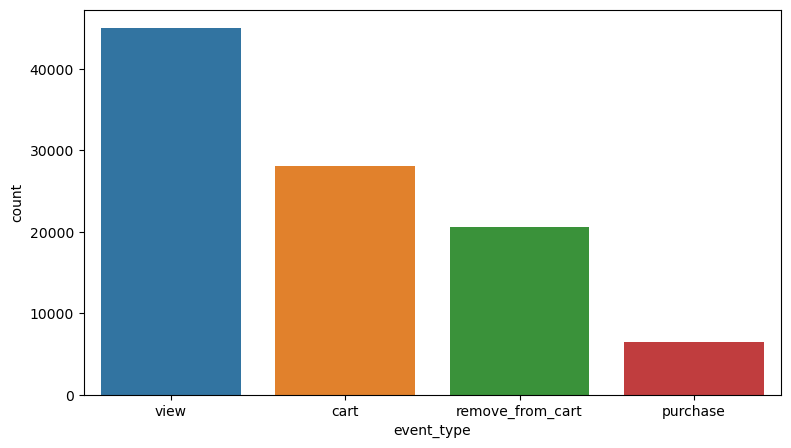

In [16]:
import seaborn as sns

plt.figure(figsize=(9,5)) 
sns.countplot(x="event_type", data=data)
plt.show()

# Q6

In [17]:
sd = data[["user_id","user_session","funnel_number","index_in_funnel","event_type","duration_to_next_event","product_id"]].copy()
sd.head()

,user_id,user_session,funnel_number,index_in_funnel,event_type,duration_to_next_event,product_id
0,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,1,1,view,0 days 00:00:00,5802432
1,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1,1,cart,0 days 00:00:00,5844397
2,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,1,1,view,0 days 00:00:00,5837166
3,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,1,1,cart,0 days 00:00:00,5876812
4,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1,2,remove_from_cart,0 days 00:00:15,5826182


In [18]:
sd["num_of_events"] = sd.groupby("user_session")[["event_type"]].transform("count")
sd

,user_id,user_session,funnel_number,index_in_funnel,event_type,duration_to_next_event,product_id,num_of_events
0,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,1,1,view,0 days 00:00:00,5802432,8
1,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1,1,cart,0 days 00:00:00,5844397,12
2,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,1,1,view,0 days 00:00:00,5837166,20
3,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,1,1,cart,0 days 00:00:00,5876812,2
4,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1,2,remove_from_cart,0 days 00:00:15,5826182,12
...,...,...,...,...,...,...,...,...
99995,566569680,ec103d0c-7d8b-40c1-aadd-de5ac99aadbb,1,419,remove_from_cart,0 days 00:00:00,5864318,423
99996,566569680,ec103d0c-7d8b-40c1-aadd-de5ac99aadbb,1,420,remove_from_cart,0 days 00:00:00,5864318,423
99997,566569680,ec103d0c-7d8b-40c1-aadd-de5ac99aadbb,1,421,remove_from_cart,0 days 00:00:00,5864318,423
99998,566569680,ec103d0c-7d8b-40c1-aadd-de5ac99aadbb,1,422,remove_from_cart,0 days 00:00:00,5864318,423


In [19]:
sd["duration_per_session"] = sd.groupby(['funnel_number', 'user_session'])[["duration_to_next_event"]].transform("sum")
sd

,user_id,user_session,funnel_number,index_in_funnel,event_type,duration_to_next_event,product_id,num_of_events,duration_per_session
0,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,1,1,view,0 days 00:00:00,5802432,8,0 days 00:05:00
1,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1,1,cart,0 days 00:00:00,5844397,12,0 days 00:02:58
2,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,1,1,view,0 days 00:00:00,5837166,20,0 days 00:24:17
3,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,1,1,cart,0 days 00:00:00,5876812,2,0 days 00:01:43
4,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1,2,remove_from_cart,0 days 00:00:15,5826182,12,0 days 00:02:58
...,...,...,...,...,...,...,...,...,...
99995,566569680,ec103d0c-7d8b-40c1-aadd-de5ac99aadbb,1,419,remove_from_cart,0 days 00:00:00,5864318,423,0 days 00:16:16
99996,566569680,ec103d0c-7d8b-40c1-aadd-de5ac99aadbb,1,420,remove_from_cart,0 days 00:00:00,5864318,423,0 days 00:16:16
99997,566569680,ec103d0c-7d8b-40c1-aadd-de5ac99aadbb,1,421,remove_from_cart,0 days 00:00:00,5864318,423,0 days 00:16:16
99998,566569680,ec103d0c-7d8b-40c1-aadd-de5ac99aadbb,1,422,remove_from_cart,0 days 00:00:00,5864318,423,0 days 00:16:16


In [20]:
session_data = sd.groupby(['user_id', 'user_session']).apply(
    lambda x: pd.Series({
        'list_of_viewed': list(x.loc[x['event_type'] == 'view', 'product_id']),
        'list_of_carted': list(x.loc[x['event_type'] == 'cart', 'product_id']),
        'list_of_purchased': list(x.loc[x['event_type'] == 'purchase', 'product_id'])
    })
).reset_index()


In [21]:
session_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22050 entries, 0 to 22049
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            22050 non-null  int64 
 1   user_session       22050 non-null  object
 2   list_of_viewed     22050 non-null  object
 3   list_of_carted     22050 non-null  object
 4   list_of_purchased  22050 non-null  object
dtypes: int64(1), object(4)
memory usage: 861.5+ KB


In [22]:
session_data = pd.merge(sd,session_data , how='left', on=['user_id',"user_session"])


In [23]:
session_data = session_data.drop(columns=['event_type', 'duration_to_next_event',"product_id"])


In [24]:
session_data.head()

,user_id,user_session,funnel_number,index_in_funnel,num_of_events,duration_per_session,list_of_viewed,list_of_carted,list_of_purchased
0,562076640,09fafd6c-6c99-46b1-834f-33527f4de241,1,1,8,0 days 00:05:00,"[5802432, 5856189, 5856190, 5674484, 5856190, ...",[5674484],[]
1,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1,1,12,0 days 00:02:58,[],"[5844397, 4607, 4600, 5817690, 5723270, 30195,...",[]
2,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f,1,1,20,0 days 00:24:17,"[5837166, 5534, 5891179, 5803085, 5759382, 588...","[5835898, 5766772]",[]
3,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7,1,1,2,0 days 00:01:43,[],"[5876812, 5862929]",[]
4,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb,1,2,12,0 days 00:02:58,[],"[5844397, 4607, 4600, 5817690, 5723270, 30195,...",[]
